## Applied Machine Learning Project 2
## Logistic Regression, SVM and Neural Networks

### Sai Jyothi Ongole - so70@uakron.edu
### Trevor Laboe - tjl92@uakron.edu
### Madeline Gesquiere - meg114@uakron.edu

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import fetch_california_housing

In [4]:
housing_dataset = fetch_california_housing(as_frame=True)
housing_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
a = pd.DataFrame(housing_dataset.data, columns = housing_dataset.feature_names)
b = pd.DataFrame(housing_dataset.target)
b.columns = ['MedianHouseValue']
cali_housing = pd.concat([a,b], axis=1)
cali_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
cali_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Check for duplicate rows to prevent Data Leakage problem

In [8]:
dups = cali_housing[cali_housing.duplicated()]
print(dups)

Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedianHouseValue]
Index: []


In [9]:
cali_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
cali_housing['expensive'] = np.where(cali_housing['MedianHouseValue']>2,"Expensive","Not Expensive")
cali_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue,expensive
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Expensive
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Expensive
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Expensive
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Expensive
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Expensive


Not Expensive    11931
Expensive         8709
Name: expensive, dtype: int64


<AxesSubplot:xlabel='expensive', ylabel='count'>

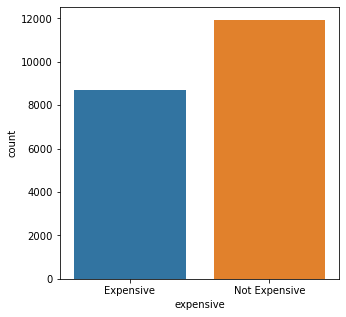

In [11]:
print(cali_housing['expensive'].value_counts())
plt.figure(figsize = (5,5))
sb.countplot(x='expensive',data=cali_housing)

In [12]:
cali_housing.drop(columns=['MedianHouseValue']).groupby('expensive').apply(lambda group:group.describe())

MedInc      HouseAge      AveRooms     AveBedrms  \
expensive                                                                     
Expensive     count   8709.000000   8709.000000   8709.000000   8709.000000   
              mean       5.071911     29.762774      5.750249      1.066770   
              std        2.100770     12.945009      2.367780      0.366025   
              min        0.499900      2.000000      1.378486      0.333333   
              25%        3.645100     19.000000      4.716080      1.002451   
              50%        4.744300     30.000000      5.641700      1.041363   
              75%        6.066700     38.000000      6.554667      1.086053   
              max       15.000100     52.000000    141.909091     25.636364   
Not Expensive count  11931.000000  11931.000000  11931.000000  11931.000000   
              mean       2.993830     27.819546      5.194505      1.118504   
              std        1.095687     12.252247      2.523437      0.538168   
              min        0.499900      1.000000      0.846154      0.444444   
              25%        2.180800     17.000000      4.313822      1.009029   
              50%        2.883500     28.000000      4.996287      1.054502   
              75%        3.703100     36.000000      5.681421      1.111594   
              max       15.000100     52.000000    132.533333     34.066667   

                       Population      AveOccup      Latitude     Longitude  
expensive                                                                    
Expensive     count   8709.000000   8709.000000   8709.000000   8709.000000  
              mean    1410.623952      2.781768     35.371504   -119.733163  
              std     1102.047790      5.937964      1.878626      1.998901  
              min        3.000000      0.750000     32.560000   -123.810000  
              25%      786.000000      2.301829     33.890000   -122.020000  
              50%     1148.000000      2.667476     34.190000   -118.480000  
              75%     1692.000000      3.022831     37.480000   -118.100000  
              max    16122.000000    502.461538     39.340000   -114.620000  
Not Expensive count  11931.000000  11931.000000  11931.000000  11931.000000  
              mean    1436.318498      3.281528     35.821908   -119.450388  
              std     1154.082256     12.679666      2.287165      1.998565  
              min        6.000000      0.692308     32.540000   -124.350000  
              25%      788.000000      2.536999     33.950000   -121.350000  
              50%     1181.000000      2.960887     34.770000   -118.810000  
              75%     1753.000000      3.525759     37.930000   -117.930000  
              max    35682.000000   1243.333333     41.950000   -114.310000

In [11]:
cali_housing.drop(columns=['MedianHouseValue']).groupby('expensive').apply(lambda group:group.median())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
expensive,,,,,,,,
Expensive,4.7443,30.0,5.641700,1.041363,1148.0,2.667476,34.19,-118.48
Not Expensive,2.8835,28.0,4.996287,1.054502,1181.0,2.960887,34.77,-118.81


In [12]:
cali_housing.drop(columns=['MedianHouseValue']).groupby('expensive').apply(lambda group:group.mode())

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
expensive                                                                       
Expensive     0  15.0001      52.0       4.5        1.0       825.0       3.0   
              1      NaN       NaN       6.0        NaN         NaN       NaN   
Not Expensive 0   2.8750      36.0       5.0        1.0      1005.0       3.0   
              1   3.1250       NaN       NaN        NaN         NaN       NaN   

                 Latitude  Longitude      expensive  
expensive                                            
Expensive     0     34.16    -118.36      Expensive  
              1       NaN        NaN            NaN  
Not Expensive 0     33.93    -118.19  Not Expensive  
              1       NaN        NaN            NaN

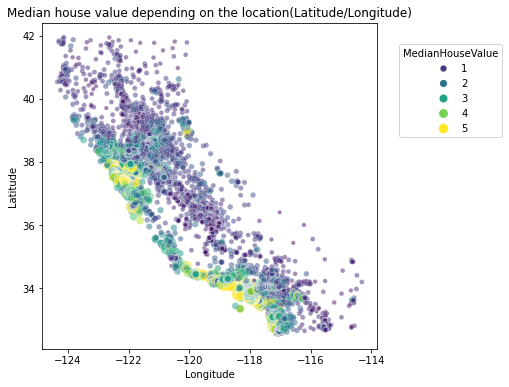

In [13]:
plt.figure(figsize=(6,6))
sb.scatterplot(data=cali_housing, x="Longitude", y="Latitude",size="MedianHouseValue", hue="MedianHouseValue",palette="viridis", alpha=0.5)
plt.legend(title="MedianHouseValue", bbox_to_anchor=(1.05, 0.95),loc="upper left")
_ = plt.title("Median house value depending on the location(Latitude/Longitude)")

In [14]:
corr_matrix = cali_housing.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedianHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


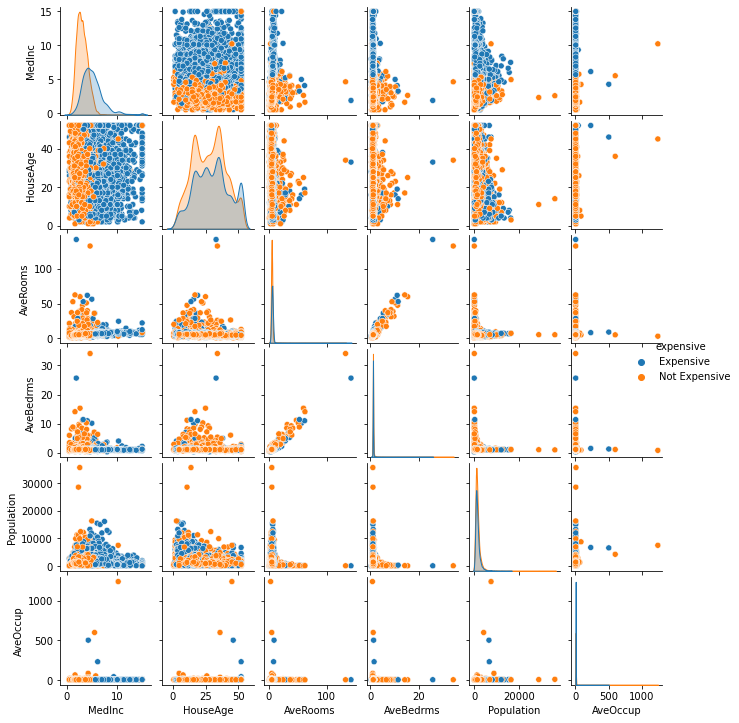

In [15]:
pairplot = sb.pairplot(cali_housing.drop(columns=['MedianHouseValue','Latitude','Longitude']), hue="expensive")
pairplot.fig.set_size_inches(10, 10)

In [27]:
# Logistic Regression

X = cali_housing.drop(columns = ['MedianHouseValue','expensive'])
y = cali_housing['expensive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
#Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
print("Logistic Regression Accuracy is "+ str(lr.score(X_test,y_test) *100))

Logistic Regression Accuracy is 82.71317829457364


In [29]:
#Coefficients of linear model (b_1,b_2,...,b_p): log(p/(1-p)) = b0+b_1x_1+b_2x_2+...+b_px_p (b-Beta values)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

# Estimate the accuracy of the classifier on future data, using the test data
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)*100))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)*100))

lr.coef_: [[-2.49964423 -0.33460648  0.85292619 -1.00790406 -0.06542772  2.67512768
   3.63493894  3.43565408]]
lr.intercept_: [0.62545825]
Training set score: 83.31
Test set score: 82.71


In [18]:
#Implementing k-fold cross validation

k = 5
kfold = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
accu_score = []

for train_index , test_index in kfold.split(X):
    Xk_train , Xk_test = X.iloc[train_index,:],X.iloc[test_index,:]
    yk_train , yk_test = y[train_index] , y[test_index]
     
    model.fit(Xk_train,yk_train)
    pred_values = model.predict(Xk_test)
     
    acc = accuracy_score(pred_values , yk_test)
    accu_score.append(acc)
     
avg_acc_score = sum(accu_score)/k

print('Accuracy of each fold - {}'.format(accu_score))
print('Avg Accuracy : {}'.format(avg_acc_score * 100))

Accuracy of each fold - [0.841327519379845, 0.7565406976744186, 0.8052325581395349, 0.78125, 0.783187984496124]
Avg Accuracy : 79.35077519379846


### Predicting Test Dataset


In [19]:
y_pred = lr.predict(X_test)
print("Logistic Regression model Accuracy: ", accuracy_score(y_test, y_pred) * 100)

Logistic Regression model Accuracy:  82.6937984496124


In [20]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

    Expensive       0.82      0.77      0.79      2227
Not Expensive       0.83      0.87      0.85      2933

     accuracy                           0.83      5160
    macro avg       0.83      0.82      0.82      5160
 weighted avg       0.83      0.83      0.83      5160



[[1717  510]
 [ 383 2550]]


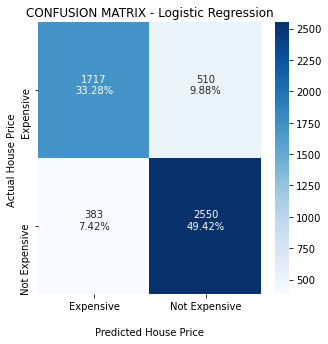

In [21]:
print(confusion_matrix(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n" for v1, v2 in
zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sb.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('CONFUSION MATRIX - Logistic Regression');
ax.set_xlabel('\nPredicted House Price')
ax.set_ylabel('Actual House Price ');
ax.xaxis.set_ticklabels(['Expensive','Not Expensive'])
ax.yaxis.set_ticklabels(['Expensive','Not Expensive'])
plt.show()

In [32]:
# Support Vector Machine

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size=0.25, random_state=30)
#scale the dataset using mean and std; do training/testing separately to avoid data leakage problem
standardize = True
if standardize:
    Xs_train = (Xs_train - Xs_train.mean())/Xs_train.std()
    Xs_test = (Xs_test - X.mean())/X.std()
# SVM classifier
clf = svm.SVC(C=10, kernel = 'linear')
# train the model using training sets, and predict response for test dataset
clf.fit(Xs_train, ys_train)
ys_pred = clf.predict(Xs_test)
# display the model accuracy
print("SVM model Accuracy: "+ str(clf.score(Xs_test,ys_test) *100))
print("Training set score: {:.2f}".format(clf.score(Xs_train, ys_train)*100))
print("Test set score: {:.2f}".format(clf.score(Xs_test, ys_test)*100))

SVM model Accuracy: 84.32170542635659
Training set score: 84.38
Test set score: 84.32


In [23]:
print('Coefficients = ',clf.coef_)
print('Intercept = ',clf.intercept_)
print('Indices of support vectors = ', clf.support_)
# Which data points are important?
print('Support vectors = ', clf.support_vectors_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

Coefficients =  [[-1.84103806 -0.25917229  0.59871202 -0.69788714 -0.06229119  5.17604248
   2.65790776  2.51023348]]
Intercept =  [0.52050014]
Indices of support vectors =  [    1    16    24 ... 15460 15465 15467]
Support vectors =  [[-0.48888923 -0.3678755  -0.64795618 ...  0.04763194 -0.72574279
   0.71106126]
 [-0.05839093 -1.790467   -0.38312651 ... -0.06112858 -0.97459093
   0.94591507]
 [ 0.47810524 -0.05174406  0.43750259 ... -0.0323957   1.30260435
  -1.36264791]
 ...
 [ 0.66737967 -0.13077692 -0.1511163  ...  0.08645886 -0.83373349
   0.6411048 ]
 [-0.51166303  1.68697888  0.03075439 ...  0.01596094 -0.74921903
   0.62111724]
 [ 0.16346997 -0.52594122  0.09446385 ...  0.05722118 -1.37368701
   1.27071289]]
Number of support vectors for each class =  [3166 3167]
Coefficients of the support vector in the decision function =  [[1. 1. 1. ... 1. 1. 1.]]


In [25]:
print(classification_report(ys_test, ys_pred))

               precision    recall  f1-score   support

    Expensive       0.83      0.80      0.82      2227
Not Expensive       0.85      0.88      0.86      2933

     accuracy                           0.84      5160
    macro avg       0.84      0.84      0.84      5160
 weighted avg       0.84      0.84      0.84      5160



[[1783  444]
 [ 365 2568]]


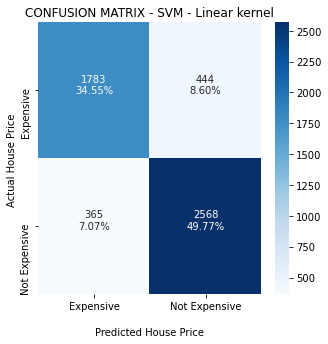

In [26]:
print(confusion_matrix(ys_test, ys_pred))
cf_matrix = confusion_matrix(ys_test, ys_pred)
plt.figure(figsize = (5,5))
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n" for v1, v2 in
zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sb.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('CONFUSION MATRIX - SVM - Linear kernel');
ax.set_xlabel('\nPredicted House Price')
ax.set_ylabel('Actual House Price ');
ax.xaxis.set_ticklabels(['Expensive','Not Expensive'])
ax.yaxis.set_ticklabels(['Expensive','Not Expensive'])
plt.show()

In [38]:
#SVM - poly classifier
clfpoly = svm.SVC(kernel = 'poly')
# train the model using training sets, and predict response for test dataset
clfpoly.fit(Xs_train, ys_train)
ys_pred = clfpoly.predict(Xs_test)
# display the model accuracy
print("SVM poly Classifier Accuracy: "+ str(clfpoly.score(Xs_test,ys_test) *100))
print("Training set score: {:.2f}".format(clfpoly.score(Xs_train, ys_train)*100))
print("Test set score: {:.2f}".format(clfpoly.score(Xs_test, ys_test)*100))

SVM poly Classifier Accuracy: 81.27906976744185
Training set score: 82.13
Test set score: 81.28


[[1511  716]
 [ 250 2683]]


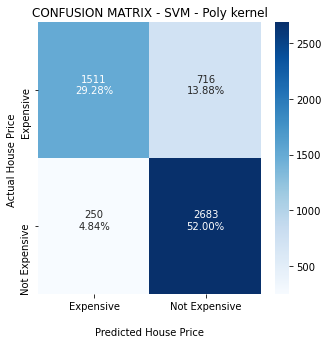

In [39]:
print(confusion_matrix(ys_test, ys_pred))
cf_matrix = confusion_matrix(ys_test, ys_pred)
plt.figure(figsize = (5,5))
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n" for v1, v2 in
zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sb.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('CONFUSION MATRIX - SVM - Poly kernel');
ax.set_xlabel('\nPredicted House Price')
ax.set_ylabel('Actual House Price ');
ax.xaxis.set_ticklabels(['Expensive','Not Expensive'])
ax.yaxis.set_ticklabels(['Expensive','Not Expensive'])
plt.show()

In [36]:
#SVM - rbf classifier
clfrbf = svm.SVC(kernel = 'rbf')
# train the model using training sets, and predict response for test dataset
clfrbf.fit(Xs_train, ys_train)
ys_pred = clfrbf.predict(Xs_test)
# display the model accuracy
print("SVM rbf kernel Accuracy: "+ str(clfrbf.score(Xs_test,ys_test) *100))
print("Training set score: {:.2f}".format(clfrbf.score(Xs_train, ys_train)*100))
print("Test set score: {:.2f}".format(clfrbf.score(Xs_test, ys_test)*100))
print(classification_report(ys_test, ys_pred))

SVM rbf kernel Accuracy: 85.54263565891473
Training set score: 86.28
Test set score: 85.54
               precision    recall  f1-score   support

    Expensive       0.85      0.81      0.83      2227
Not Expensive       0.86      0.89      0.88      2933

     accuracy                           0.86      5160
    macro avg       0.85      0.85      0.85      5160
 weighted avg       0.86      0.86      0.85      5160



[[1797  430]
 [ 316 2617]]


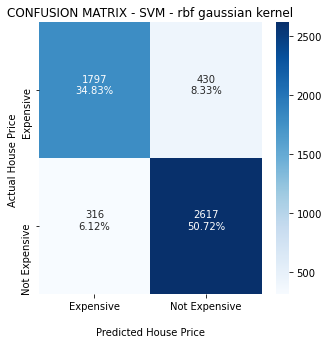

In [37]:
print(confusion_matrix(ys_test, ys_pred))
cf_matrix = confusion_matrix(ys_test, ys_pred)
plt.figure(figsize = (5,5))
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n" for v1, v2 in
zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sb.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('CONFUSION MATRIX - SVM - rbf gaussian kernel');
ax.set_xlabel('\nPredicted House Price')
ax.set_ylabel('Actual House Price ');
ax.xaxis.set_ticklabels(['Expensive','Not Expensive'])
ax.yaxis.set_ticklabels(['Expensive','Not Expensive'])
plt.show()

In [35]:
#print('Coefficients = ',clfrbf.coef_) #Only for linear kernel
print('Intercept = ',clfrbf.intercept_)
print('Indices of support vectors = ', clfrbf.support_)
# Which data points are important?
print('Support vectors = ', clfrbf.support_vectors_)
print('Number of support vectors for each class = ', clfrbf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clfrbf.dual_coef_))

Intercept =  [0.23429221]
Indices of support vectors =  [    1    16    24 ... 15456 15460 15465]
Support vectors =  [[-0.48888923 -0.3678755  -0.64795618 ...  0.04763194 -0.72574279
   0.71106126]
 [-0.05839093 -1.790467   -0.38312651 ... -0.06112858 -0.97459093
   0.94591507]
 [ 0.47810524 -0.05174406  0.43750259 ... -0.0323957   1.30260435
  -1.36264791]
 ...
 [ 0.85717883  0.26438738  0.2256362  ...  0.01091298  1.15705166
  -0.89294029]
 [ 0.66737967 -0.13077692 -0.1511163  ...  0.08645886 -0.83373349
   0.6411048 ]
 [-0.51166303  1.68697888  0.03075439 ...  0.01596094 -0.74921903
   0.62111724]]
Number of support vectors for each class =  [3008 3035]
Coefficients of the support vector in the decision function =  [[1. 1. 1. ... 1. 1. 1.]]


In [29]:
#SVM - sigmoid classifier
clfsig = svm.SVC(kernel = 'sigmoid')
# train the model using training sets, and predict response for test dataset
clfsig.fit(Xs_train, ys_train)
ys_pred = clfsig.predict(Xs_test)
# display the model accuracy
print("SVM model sigmoid Accuracy: "+ str(clfsig.score(Xs_test,ys_test) *100))
print("Training set score: {:.2f}".format(clfsig.score(Xs_train, ys_train)*100))
print("Test set score: {:.2f}".format(clfsig.score(Xs_test, ys_test)*100))

SVM model sigmoid Accuracy: 71.16279069767441
Training set score: 70.72
Test set score: 71.16


In [30]:
#Precomputed kernel cannot be implemented because the input must be a square matrix and our input dataset is a 15480 X 8 matrix.
#SVM - precomputed classifier
clfpre = svm.SVC(kernel = 'precomputed')
# train the model using training sets, and predict response for test dataset
clfpre.fit(Xs_train, ys_train)
ys_pred = clfpre.predict(Xs_test)
# display the model accuracy
print("SVM precomputed Accuracy: "+ str(clfpre.score(Xs_test,ys_test) *100))
print("Training set score: {:.2f}".format(clfpre.score(Xs_train, ys_train)*100))
print("Test set score: {:.2f}".format(clfpre.score(Xs_test, ys_test)*100))

ValueError: Precomputed matrix must be a square matrix. Input is a 15480x8 matrix.

In [13]:
#Artificial Neural Network

cali_housing2 = pd.concat([a,b], axis=1)
cali_housing2['expensive'] = np.where(cali_housing['MedianHouseValue']>2,1,0)
cali_housing2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue,expensive
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


In [14]:
data = cali_housing2.drop(columns='MedianHouseValue').values
data

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    1.        ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    1.        ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    1.        ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.        ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.        ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.        ]])

In [15]:
X2 = data[:,0:8]
y2 = data[:,8]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X2)
X_scale

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.00149943, 0.5674814 ,
        0.21115538],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.00114074, 0.565356  ,
        0.21215139],
       [0.46602805, 1.        , 0.05275646, ..., 0.00169796, 0.5642933 ,
        0.21015936],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.0013144 , 0.73219979,
        0.31175299],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.0011515 , 0.73219979,
        0.30179283],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.00154886, 0.72582359,
        0.30976096]])

In [16]:
Xn_train, X_val_test, yn_train, y_val_test = train_test_split(X_scale, y2, test_size=0.30)
X_val, Xn_test, y_val, yn_test = train_test_split(X_val_test, y_val_test, test_size=0.5)
print(Xn_train.shape, X_val.shape, Xn_test.shape, yn_train.shape, y_val.shape, yn_test.shape)

(14448, 8) (3096, 8) (3096, 8) (14448,) (3096,) (3096,)


In [63]:
ann = Sequential([Dense(32, activation='relu', input_shape=(8,)), Dense(32, activation='relu'),Dense(1, activation='sigmoid')])
ann.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
ann_res = ann.fit(Xn_train, yn_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
452/452 [==============================] - 1s 2ms/step - loss: 0.6761 - accuracy: 0.5729 - val_loss: 0.6662 - val_accuracy: 0.5724
Epoch 2/100
452/452 [==============================] - 1s 1ms/step - loss: 0.6546 - accuracy: 0.5854 - val_loss: 0.6464 - val_accuracy: 0.5862
Epoch 3/100
452/452 [==============================] - 1s 1ms/step - loss: 0.6306 - accuracy: 0.6238 - val_loss: 0.6176 - val_accuracy: 0.6424
Epoch 4/100
452/452 [==============================] - 1s 1ms/step - loss: 0.5960 - accuracy: 0.6995 - val_loss: 0.5777 - val_accuracy: 0.7464
Epoch 5/100
452/452 [==============================] - 1s 2ms/step - loss: 0.5516 - accuracy: 0.7693 - val_loss: 0.5297 - val_accuracy: 0.7884
Epoch 6/100
452/452 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.7916 - val_loss: 0.4850 - val_accuracy: 0.8072
Epoch 7/100
452/452 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.8009 - val_loss: 0.4535 - val_accuracy: 0.8120

Epoch 58/100
452/452 [==============================] - 1s 1ms/step - loss: 0.3852 - accuracy: 0.8199 - val_loss: 0.3864 - val_accuracy: 0.8253
Epoch 59/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3850 - accuracy: 0.8189 - val_loss: 0.3868 - val_accuracy: 0.8307
Epoch 60/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3847 - accuracy: 0.8203 - val_loss: 0.3867 - val_accuracy: 0.8311
Epoch 61/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3836 - accuracy: 0.8224 - val_loss: 0.3853 - val_accuracy: 0.8304
Epoch 62/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3839 - accuracy: 0.8219 - val_loss: 0.3891 - val_accuracy: 0.8262
Epoch 63/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3842 - accuracy: 0.8198 - val_loss: 0.3862 - val_accuracy: 0.8249
Epoch 64/100
452/452 [==============================] - 1s 2ms/step - loss: 0.3835 - accuracy: 0.8210 - val_loss: 0.3869 - val_accuracy:

In [65]:
#Accuracy
ann.evaluate(Xn_test, yn_test)[1]

97/97 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8191


0.8191214203834534

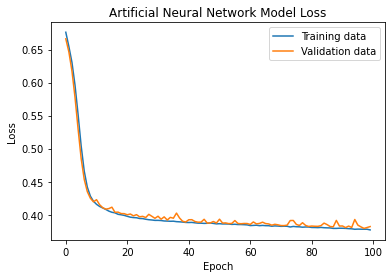

In [67]:
plt.plot(ann_res.history['loss'])
plt.plot(ann_res.history['val_loss'])
plt.title('Artificial Neural Network Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='upper right')
plt.show()

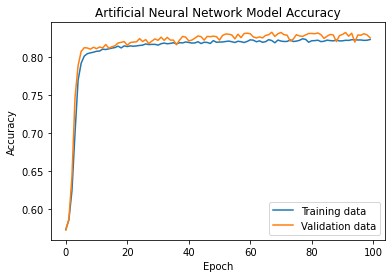

In [68]:
plt.plot(ann_res.history['accuracy'])
plt.plot(ann_res.history['val_accuracy'])
plt.title('Artificial Neural Network Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.show()

### Hyperparameter tuning using manual grid search

In [23]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(X_train, y_train):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 50 ,100]
    
    
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=30, input_dim=8, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            
            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)




In [24]:
ResultsData=FunctionFindBestParams(Xn_train, yn_train)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.8181755542755127
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.8303571343421936
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.8513981103897095
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.8643410801887512
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.8148532509803772
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.8258582353591919
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.855481743812561
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.8615033030509949
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.8160299062728882
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.821290135383606
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.8455149531364441
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.8567276000976562
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.8109080791473389
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.8199058771133423
15 Param

  TrialNumber            Parameters  Accuracy
0           4  batch_size5-epoch100  0.864341


<AxesSubplot:xlabel='Parameters'>

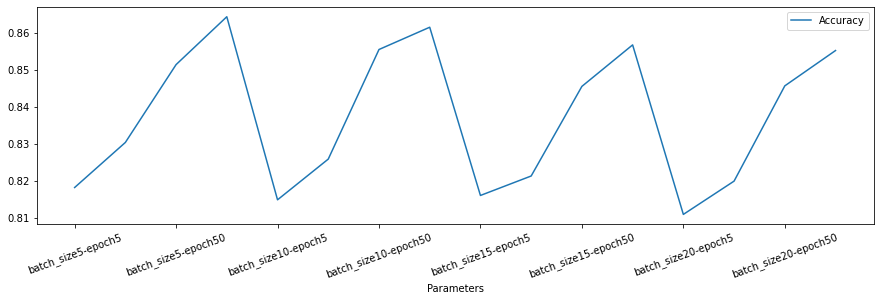

In [25]:
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)